### Two-way ANOVA (이원분산분석)
#### #01. 작업 준비

패키지 가져오기

In [1]:
from pandas import read_excel, melt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import normality_test, equal_variance_test, independence_test, all_test

예제 (1)

###### 태아의 머리 둘레 측정 데이터.
###### 3명의 태아를 대상으로 4명의 관측자가 측정.
###### 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사

In [2]:
# 데이터 가져오기
df = read_excel("https://data.hossam.kr/E02/alrtman.xlsx")
df

,태아번호,측정자번호,머리둘레
0,1,1,14.3
1,1,1,14.0
2,1,1,14.8
3,1,2,13.6
4,1,2,13.6
5,1,2,13.8
6,1,3,13.9
7,1,3,13.7
8,1,3,13.8
9,1,4,13.8


#### 2. 탐색적 데이터 분석
##### 측정자에 따른 태아의 머리둘레 확인
###### 그림을 보면 태아 3명의 머리둘레는 차이가 있어보이지만 이것이 관측자와 상호작용이 있는 것인지 분석을 통해 알아보고자 함

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

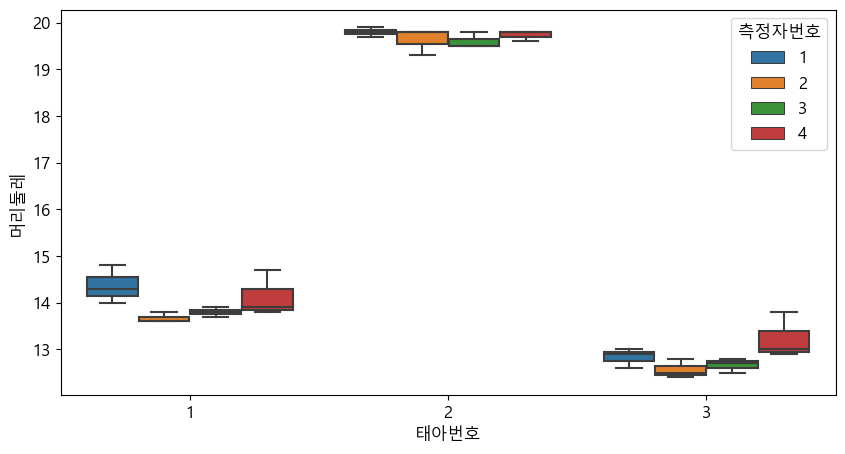

In [4]:
plt.figure()
sb.boxplot(data=df, x='태아번호', y='머리둘레', hue='측정자번호')
plt.show()
plt.close()

#### 3. 추론적 데이터 분석
##### 가설 설정
|가설|내용|
|--|--|
|귀무가설|테아의 머리 둘레 차이는 측정자와 연관이 없다.|
|대립가설|테아의 머리 둘레 차이는 측정자와 연관이 있다.|

##### 정규성, 등분산성, 독립성 검정
###### 예제 데이터이므로 충족한다고 가정하고 분석을 진행함

In [5]:
all_test(df['태아번호'], df['측정자번호'], df['머리둘레'])

AttributeError: 'Series' object has no attribute 'names'